In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
from datetime import datetime, timedelta

In [73]:
%reload_ext watermark


In [74]:
watermark --iversions

matplotlib: 3.10.8
numpy     : 2.4.2
pandas    : 3.0.0
seaborn   : 0.13.2



In [75]:
def gerar_dados_ficticios(num_registros=600):
    produtos = {
        "Laptop Gamer": {"categoria": "Eletrônicos", "preco": 7500.00},
        "Mouse Vertical": {"categoria": "Acessórios", "preco": 250.00},
        "Teclado Mecânico": {"categoria": "Acessórios", "preco": 550.00},
        "Monitor Ultrawide": {"categoria": "Eletrônicos", "preco": 2800.00},
        "Cadeira Gamer": {"categoria": "Móveis", "preco": 1200.00},
        "Headset 7.1": {"categoria": "Acessórios", "preco": 800.00},
        "Placa de Vídeo": {"categoria": "Hardware", "preco": 4500.00},
        "SSD 1TB": {"categoria": "Hardware", "preco": 600.00},
    }
    lista_produtos = list(produtos.keys())
    cidades_estados = {
        "São Paulo": "SP",
        "Rio de Janeiro": "RJ",
        "Belo Horizonte": "MG",
        "Porto Alegre": "RS",
        "Salvador": "BA",
        "Curitiba": "PR",
        "Fortaleza": "CE",
    }
    lista_cidades = list(cidades_estados.keys())

    dados_vendas = []
    data_inicial = datetime(2026, 1, 1)

    for i in range(num_registros):
        produto_nome = random.choice(lista_produtos)

        cidade = random.choice(lista_cidades)

        quantidade = np.random.randint(1, 8)

        data_pedido = data_inicial + timedelta(
            days=int(i / 5), hours=random.randint(0, 23)
        )

        if produto_nome in ["Mouse Vertical", "Teclado Mecânico"]:
            preco_unitario = produtos[produto_nome]["preco"] * np.random.uniform(
                0.9, 1.0
            )
        else:
            preco_unitario = produtos[produto_nome]["preco"]

        dados_vendas.append(
            {
                "ID_Pedido": 1000 + i,
                "Data_Pedido": data_pedido,
                "Nome_Produto": produto_nome,
                "Categoria": produtos[produto_nome]["categoria"],
                "Preco_Unitario": round(preco_unitario, 2),
                "Quantidade": quantidade,
                "ID_Cliente": np.random.randint(100, 150),
                "Cidade": cidade,
                "Estado": cidades_estados[cidade],
            }
        )

    return pd.DataFrame(dados_vendas)

In [76]:
df_vendas = gerar_dados_ficticios(500)

In [77]:
df_vendas.shape

(500, 9)

In [80]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 07:00:00,Headset 7.1,Acessórios,800.00,1,130,Rio de Janeiro,RJ
1,1001,2026-01-01 15:00:00,Laptop Gamer,Eletrônicos,7500.00,2,101,Curitiba,PR
2,1002,2026-01-01 19:00:00,Mouse Vertical,Acessórios,230.18,7,134,Salvador,BA
3,1003,2026-01-01 08:00:00,Teclado Mecânico,Acessórios,522.41,5,102,Rio de Janeiro,RJ
4,1004,2026-01-01 21:00:00,Mouse Vertical,Acessórios,227.04,7,136,Rio de Janeiro,RJ


In [81]:
df_vendas.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[us]
 2   Nome_Produto    500 non-null    str           
 3   Categoria       500 non-null    str           
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    str           
 8   Estado          500 non-null    str           
dtypes: datetime64[us](1), float64(1), int64(3), str(4)
memory usage: 35.3 KB


In [83]:
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.000000,500.000000,500.000000
mean,1249.500000,2026-02-19 23:30:28.800000,2288.553760,4.024000,125.098000
min,1000.000000,2026-01-01 07:00:00,225.040000,1.000000,100.000000
25%,1124.750000,2026-01-26 03:45:00,547.522500,2.000000,113.000000
50%,1249.500000,2026-02-19 22:30:00,800.000000,4.000000,125.000000
75%,1374.250000,2026-03-16 22:30:00,4500.000000,6.000000,138.000000
max,1499.000000,2026-04-10 22:00:00,7500.000000,7.000000,149.000000
std,144.481833,NaN,2396.663097,2.008854,14.152207


In [84]:
df_vendas["Data_Pedido"] = pd.to_datetime(df_vendas["Data_Pedido"])

In [85]:
df_vendas["Faturamento"] = df_vendas["Preco_Unitario"] * df_vendas["Quantidade"]

In [86]:
df_vendas["Status_Entrega"] = df_vendas["Estado"].apply(lambda estado: "Rapida" if estado in ['SP', 'RJ', 'MJ'] else 'Normal')

In [87]:
df_vendas.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[us]
 2   Nome_Produto    500 non-null    str           
 3   Categoria       500 non-null    str           
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    str           
 8   Estado          500 non-null    str           
 9   Faturamento     500 non-null    float64       
 10  Status_Entrega  500 non-null    str           
dtypes: datetime64[us](1), float64(2), int64(3), str(5)
memory usage: 43.1 KB


In [88]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 07:00:00,Headset 7.1,Acessórios,800.00,1,130,Rio de Janeiro,RJ,800.00,Rapida
1,1001,2026-01-01 15:00:00,Laptop Gamer,Eletrônicos,7500.00,2,101,Curitiba,PR,15000.00,Normal
2,1002,2026-01-01 19:00:00,Mouse Vertical,Acessórios,230.18,7,134,Salvador,BA,1611.26,Normal
3,1003,2026-01-01 08:00:00,Teclado Mecânico,Acessórios,522.41,5,102,Rio de Janeiro,RJ,2612.05,Rapida
4,1004,2026-01-01 21:00:00,Mouse Vertical,Acessórios,227.04,7,136,Rio de Janeiro,RJ,1589.28,Rapida


## Análise 1 - Top 10 Produtos Mais Vendidos

In [100]:
top_10_produtos = (
    df_vendas.groupby("Nome_Produto")["Quantidade"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [103]:
top_10_produtos

Nome_Produto
SSD 1TB              285
Teclado Mecânico     280
Placa de Vídeo       275
Laptop Gamer         246
Headset 7.1          239
Mouse Vertical       236
Cadeira Gamer        228
Monitor Ultrawide    223
Name: Quantidade, dtype: int64

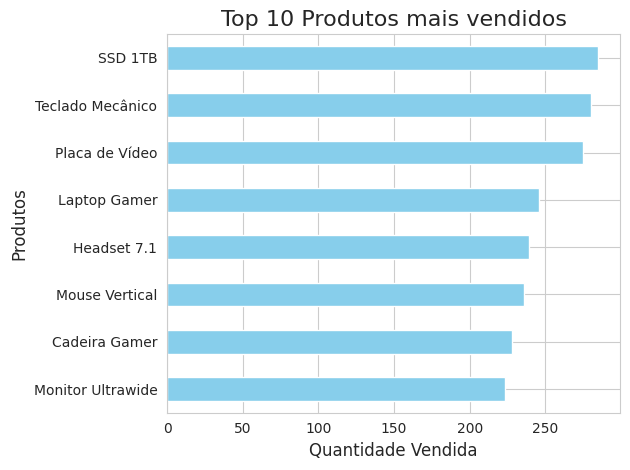

In [104]:
sns.set_style("whitegrid")

plt.Figure(figsize=(12, 7))

top_10_produtos.sort_values(ascending=True).plot(kind="barh", color="skyblue")

plt.title("Top 10 Produtos mais vendidos", fontsize=16)
plt.xlabel("Quantidade Vendida", fontsize=12)
plt.ylabel("Produtos", fontsize=12)

plt.tight_layout()
plt.show()